In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.model_selection import train_test_split
from scipy.stats import norm, zscore
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import *
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.impute import KNNImputer
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import *
import time
from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [3]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', sep=',')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.duplicated().sum()

24

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2087,2087.000000,2087.000000,2087.000000,2087,2087,2087.000000,2087.000000,2087,2087,2087.000000,2087,2087.000000,2087.000000,2087,2087,2087
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,NaN,NaN,NaN,1722,1844,NaN,NaN,1761,2043,NaN,1991,NaN,NaN,1380,1558,351
mean,NaN,24.353090,1.702674,86.858730,NaN,NaN,2.421466,2.701179,NaN,NaN,2.004749,NaN,1.012812,0.663035,NaN,NaN,NaN
std,NaN,6.368801,0.093186,26.190847,NaN,NaN,0.534737,0.764614,NaN,NaN,0.608284,NaN,0.853475,0.608153,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.915937,1.630178,66.000000,NaN,NaN,2.000000,2.697467,NaN,NaN,1.590922,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.847618,1.701584,83.101100,NaN,NaN,2.396265,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.630866,NaN,NaN,NaN
75%,NaN,26.000000,1.769491,108.015907,NaN,NaN,3.000000,3.000000,NaN,NaN,2.466193,NaN,1.678102,1.000000,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
for col in df.select_dtypes(include='object').columns:
    print(f'{col} - {df[col].unique()}')

Gender - ['Female' 'Male']
family_history_with_overweight - ['yes' 'no']
FAVC - ['no' 'yes']
CAEC - ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE - ['no' 'yes']
SCC - ['no' 'yes']
CALC - ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS - ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad - ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [10]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [11]:
# fig, ax = plt.subplots()

# ax = sns.countplot(x=df['NObeyesdad'], data=df, palette='viridis')
    
# total = len(df)
    
# for p in ax.patches:
#     percentage = f'{100 * p.get_height() / total:.2f}%'
#     text = f'{p.get_height():.0f}\n{percentage}'
#     x = p.get_x() + p.get_width() / 2
#     y = p.get_height()
#     ax.text(x, y, text, ha='center', va='bottom')
        
# ax.set_ylabel('Count')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# sns.despine()
# plt.tight_layout()
# plt.show()

In [12]:
# def plot_distribution_categorical_percentages(df):    
#     categorical_features = df.select_dtypes(include=np.object_).columns
#     categorical_features = categorical_features.drop('NObeyesdad')
    
#     fig, axs = plt.subplots(len(categorical_features), 1, figsize=(15, len(categorical_features) * 5), constrained_layout=True)

#     for i, col in enumerate(categorical_features):

#         ax = sns.countplot(x=col, hue='NObeyesdad', data=df, ax=axs[i], order=df[col].value_counts().index, palette='viridis')

#         for bar in ax.patches:
#             bar.set_width(bar.get_width() * 0.8)
            
#         total = len(df)

#         for p in ax.patches:
#             percentage = f'{100 * p.get_height() / total:.2f}%'
#             text = f'{p.get_height():.0f}\n{percentage}'
#             x = p.get_x() + p.get_width() / 2
#             y = p.get_height()
#             ax.text(x, y, text, ha='center', va='bottom')
            

#         axs[i].set_title(f'Distribution of {col}')
#         axs[i].set_xlabel(col.capitalize())
#         axs[i].set_ylabel('Count')

#     # removing uneccessary (sub)plots
#     for j in range(i + 1, len(axs)):
#         fig.delaxes(axs[j])
        
#     sns.despine()
#     plt.show()

In [13]:
# plot_distribution_categorical_percentages(df)

In [14]:
# def plot_distribution_numerical(df):
#     numerical_features = df.select_dtypes(include=np.number).columns
#     num_features = len(numerical_features)
#     num_cols = 2
#     num_rows = (num_features + num_cols - 1) // num_cols

#     fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20), constrained_layout=True)
#     axs = axs.flatten()

#     for i, col in enumerate(numerical_features):

#         sns.histplot(x=col, data=df, ax=axs[i], kde=True, bins=20, color='blue', stat='density')
        
#         mean, std = df[col].mean(), df[col].std()
#         x = np.linspace(df[col].min(), df[col].max(), 100)
#         p = norm.pdf(x, mean, std)
#         axs[i].plot(x, p, 'k', linewidth=2, label='Normal dist.', color='red')

#         axs[i].set_title(f'Distribution of {col}\nSkew: {df[col].skew():.4f}')
#         axs[i].set_xlabel(col.capitalize())
#         axs[i].set_ylabel('Density')
#         axs[i].legend()

#     # Remove unnecessary subplots
#     for j in range(i + 1, len(axs)):
#         fig.delaxes(axs[j])
        
#     plt.show()

In [15]:
# plot_distribution_numerical(df)

In [16]:
df_unmodified = df.copy(deep=True)
df_unmodified

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [17]:
caec_categories  = [['no', 'Sometimes', 'Frequently', 'Always']]
caec_encoder = OrdinalEncoder(categories=caec_categories)
df_unmodified['CAEC'] = caec_encoder.fit_transform(df_unmodified[['CAEC']])

calc_categories  = [['no', 'Sometimes', 'Frequently', 'Always']]
calc_encoder = OrdinalEncoder(categories=calc_categories)
df_unmodified['CALC'] = calc_encoder.fit_transform(df_unmodified[['CALC']])

target_encoder = LabelEncoder()
df_unmodified['NObeyesdad'] = target_encoder.fit_transform(df_unmodified[['NObeyesdad']])

In [18]:
df_unmodified.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2087,2087.000000,2087.000000,2087.000000,2087,2087,2087.000000,2087.000000,2087.000000,2087,2087.000000,2087,2087.000000,2087.000000,2087.000000,2087,2087.000000
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,5,NaN
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,no,NaN,no,NaN,NaN,NaN,Public_Transportation,NaN
freq,1052,NaN,NaN,NaN,1722,1844,NaN,NaN,NaN,2043,NaN,1991,NaN,NaN,NaN,1558,NaN
mean,NaN,24.353090,1.702674,86.858730,NaN,NaN,2.421466,2.701179,1.146143,NaN,2.004749,NaN,1.012812,0.663035,0.729756,NaN,3.014375
std,NaN,6.368801,0.093186,26.190847,NaN,NaN,0.534737,0.764614,0.459494,NaN,0.608284,NaN,0.853475,0.608153,0.517008,NaN,1.948470
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,0.000000,NaN,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,19.915937,1.630178,66.000000,NaN,NaN,2.000000,2.697467,1.000000,NaN,1.590922,NaN,0.124505,0.000000,0.000000,NaN,1.000000
50%,NaN,22.847618,1.701584,83.101100,NaN,NaN,2.396265,3.000000,1.000000,NaN,2.000000,NaN,1.000000,0.630866,1.000000,NaN,3.000000
75%,NaN,26.000000,1.769491,108.015907,NaN,NaN,3.000000,3.000000,1.000000,NaN,2.466193,NaN,1.678102,1.000000,1.000000,NaN,5.000000


In [19]:
categorical_features = df_unmodified.select_dtypes(include=np.object_).columns
categorical_features

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC',
       'MTRANS'],
      dtype='object')

In [20]:
numerical_features = df_unmodified.select_dtypes(include=np.number).columns
numerical_features = numerical_features.drop('NObeyesdad')

# Unmodified dataset

In [21]:
target = df_unmodified["NObeyesdad"]
df_unmodified = df_unmodified.drop(["NObeyesdad"], axis=1)

In [22]:
df_unmodified.describe(include="all")

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2087,2087.000000,2087.000000,2087.000000,2087,2087,2087.000000,2087.000000,2087.000000,2087,2087.000000,2087,2087.000000,2087.000000,2087.000000,2087
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,5
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,no,NaN,no,NaN,NaN,NaN,Public_Transportation
freq,1052,NaN,NaN,NaN,1722,1844,NaN,NaN,NaN,2043,NaN,1991,NaN,NaN,NaN,1558
mean,NaN,24.353090,1.702674,86.858730,NaN,NaN,2.421466,2.701179,1.146143,NaN,2.004749,NaN,1.012812,0.663035,0.729756,NaN
std,NaN,6.368801,0.093186,26.190847,NaN,NaN,0.534737,0.764614,0.459494,NaN,0.608284,NaN,0.853475,0.608153,0.517008,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,0.000000,NaN,1.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,19.915937,1.630178,66.000000,NaN,NaN,2.000000,2.697467,1.000000,NaN,1.590922,NaN,0.124505,0.000000,0.000000,NaN
50%,NaN,22.847618,1.701584,83.101100,NaN,NaN,2.396265,3.000000,1.000000,NaN,2.000000,NaN,1.000000,0.630866,1.000000,NaN
75%,NaN,26.000000,1.769491,108.015907,NaN,NaN,3.000000,3.000000,1.000000,NaN,2.466193,NaN,1.678102,1.000000,1.000000,NaN


In [23]:
X = df_unmodified.copy()
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# one_hot_features = list(set(categorical_features) - set(['CAEC', 'CALC'])) 

# encoder = OneHotEncoder(drop='if_binary')
# one_hot_encoded = encoder.fit_transform(X_train[one_hot_features])

In [25]:
one_hot_features = list(set(categorical_features) - set(['CAEC', 'CALC'])) 

X_train = pd.get_dummies(X_train, columns=one_hot_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=one_hot_features, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [26]:
X_test

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SCC_yes,FAVC_yes
1337,18.603496,1.681719,90.671871,1.524428,3.000000,1.0,1.383831,0.130417,1.000000,1.0,False,True,False,False,False,True,False,False,True
1763,31.199261,1.848845,125.077863,2.496190,3.000000,1.0,1.662117,0.992371,0.217632,1.0,True,True,True,False,False,True,False,False,True
389,16.000000,1.610000,65.000000,1.000000,1.000000,1.0,2.000000,0.000000,0.000000,0.0,False,True,False,False,False,True,False,False,True
595,17.210933,1.819557,58.325122,2.559600,4.000000,1.0,2.000000,2.000000,0.331483,0.0,True,True,False,False,False,False,False,False,True
1735,26.734476,1.816197,119.622764,2.247037,3.000000,1.0,2.718408,0.763595,0.000000,1.0,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,30.605464,1.754796,118.805937,2.907542,3.000000,1.0,2.284494,0.647632,1.668318,1.0,True,True,False,False,False,False,False,False,True
1583,31.346845,1.823545,126.460936,2.938801,3.000000,1.0,1.478994,0.946763,1.360463,1.0,True,True,True,False,False,True,False,False,True
1743,25.492855,1.770124,114.163921,2.159033,3.000000,1.0,2.116399,1.331526,0.052942,1.0,True,True,False,False,False,True,False,False,True
1700,36.839761,1.742850,106.421042,2.541785,2.902639,1.0,1.000000,1.668961,0.000000,0.0,True,True,False,False,False,False,False,False,True


In [27]:
scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [28]:
X_test.isnull().sum()

Age                                   0
Height                                0
Weight                                0
FCVC                                  0
NCP                                   0
CAEC                                  0
CH2O                                  0
FAF                                   0
TUE                                   0
CALC                                  0
Gender_Male                           0
family_history_with_overweight_yes    0
SMOKE_yes                             0
MTRANS_Bike                           0
MTRANS_Motorbike                      0
MTRANS_Public_Transportation          0
MTRANS_Walking                        0
SCC_yes                               0
FAVC_yes                              0
dtype: int64

In [29]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test, df_score, dataset_name):
    # So KNN stops complaining
    X_train_encoded = np.ascontiguousarray(X_train)
    X_test_encoded = np.ascontiguousarray(X_test)

    decision_tree = DecisionTreeClassifier(random_state=42)
    random_forest = RandomForestClassifier(random_state=42)
    svm = SVC(probability=True, random_state=42)
    xgboost = XGBClassifier(random_state=42)
    logistic_regression = LogisticRegression()
    knn = KNeighborsClassifier()

    models = {
        'Decision Tree': decision_tree,
        'Random Forest': random_forest,
        'SVM': svm,
        'XGBOOST': xgboost,
        'Logistic Regression': logistic_regression,
        'KNN': knn
    }

    cv_results = {}
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        start_time = time.time()
        scores = cross_val_score(model, X_train_encoded, y_train, cv=kf, scoring='accuracy')
        elapsed_time = time.time() - start_time
        cv_results[name] = {
            'Accuracy': f'{scores.mean():.3f} (Time: {elapsed_time:.2f}s)',
            'Std': scores.std()
        }

    cv_results_df = pd.DataFrame(cv_results)

    test_results = {'Dataset': dataset_name}
    print(f'\n')
    
    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train_encoded, y_train)
        elapsed_time = time.time() - start_time
        y_pred = model.predict(X_test_encoded)
        accuracy = accuracy_score(y_test, y_pred)
        test_results[name] = f'Accuracy: {accuracy:.3f}, Time: {elapsed_time:.3f}s'
        print(f'{name} Test Accuracy: {accuracy:.3f}, Time = {elapsed_time:.3f}s')
        
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_encoded)[:, 1]
        else:  # For SVM without probability=True
            y_prob = model.decision_function(X_test_encoded)

    test_results_df = pd.DataFrame(test_results, index=[0])
    
    df_score = pd.concat([df_score, test_results_df], ignore_index=True)
    return df_score

In [30]:
df_score = pd.DataFrame()

df_score = train_and_evaluate_models(X_train, X_test, y_train, y_test, df_score, 'Unmodified')



Decision Tree Test Accuracy: 0.911, Time = 0.014s
Random Forest Test Accuracy: 0.962, Time = 0.408s
SVM Test Accuracy: 0.904, Time = 0.676s
XGBOOST Test Accuracy: 0.976, Time = 0.370s
Logistic Regression Test Accuracy: 0.868, Time = 0.134s
KNN Test Accuracy: 0.818, Time = 0.002s


# Filter methods

## Correlation based methods
correlation matrix for pearson, spearman, kendall

In [31]:
def correlation(df, method='pearson'):
    corr = df.corr(method=method).apply(lambda x: round(x, 2))
    fig, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(data=corr, annot=True, ax=ax)

In [32]:
df_correlation = df.copy(deep=True)
df_correlation

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [33]:
caec_categories  = [['no', 'Sometimes', 'Frequently', 'Always']]
caec_encoder = OrdinalEncoder(categories=caec_categories)
df_correlation['CAEC'] = caec_encoder.fit_transform(df_correlation[['CAEC']])

calc_categories  = [['no', 'Sometimes', 'Frequently', 'Always']]
calc_encoder = OrdinalEncoder(categories=calc_categories)
df_correlation['CALC'] = calc_encoder.fit_transform(df_correlation[['CALC']])

target_encoder = LabelEncoder()
df_correlation['NObeyesdad'] = target_encoder.fit_transform(df_correlation[['NObeyesdad']])

categorical_features = df_correlation.select_dtypes(include=np.object_).columns

one_hot_features = list(set(categorical_features) - set(['CAEC', 'CALC', 'NObeyesdad'])) 

df_correlation = pd.get_dummies(df_correlation, columns=one_hot_features, drop_first=True)

# df_correlation = df_correlation.drop([
#     'Gender', 'family_history_with_overweight',
#     'FAVC', 'SMOKE', 'SCC', 'MTRANS'],
#     axis=1)

In [34]:
df_correlation

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SCC_yes,FAVC_yes
0,21.000000,1.620000,64.000000,2.0,3.0,1.0,2.000000,0.000000,1.000000,0.0,1,False,True,False,False,False,True,False,False,False
1,21.000000,1.520000,56.000000,3.0,3.0,1.0,3.000000,3.000000,0.000000,1.0,1,False,True,True,False,False,True,False,True,False
2,23.000000,1.800000,77.000000,2.0,3.0,1.0,2.000000,2.000000,1.000000,2.0,1,True,True,False,False,False,True,False,False,False
3,27.000000,1.800000,87.000000,3.0,3.0,1.0,2.000000,2.000000,0.000000,2.0,5,True,False,False,False,False,False,True,False,False
4,22.000000,1.780000,89.800000,2.0,1.0,1.0,2.000000,0.000000,0.000000,1.0,6,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.0,1.728139,1.676269,0.906247,1.0,4,False,True,False,False,False,True,False,False,True
2107,21.982942,1.748584,133.742943,3.0,3.0,1.0,2.005130,1.341390,0.599270,1.0,4,False,True,False,False,False,True,False,False,True
2108,22.524036,1.752206,133.689352,3.0,3.0,1.0,2.054193,1.414209,0.646288,1.0,4,False,True,False,False,False,True,False,False,True
2109,24.361936,1.739450,133.346641,3.0,3.0,1.0,2.852339,1.139107,0.586035,1.0,4,False,True,False,False,False,True,False,False,True


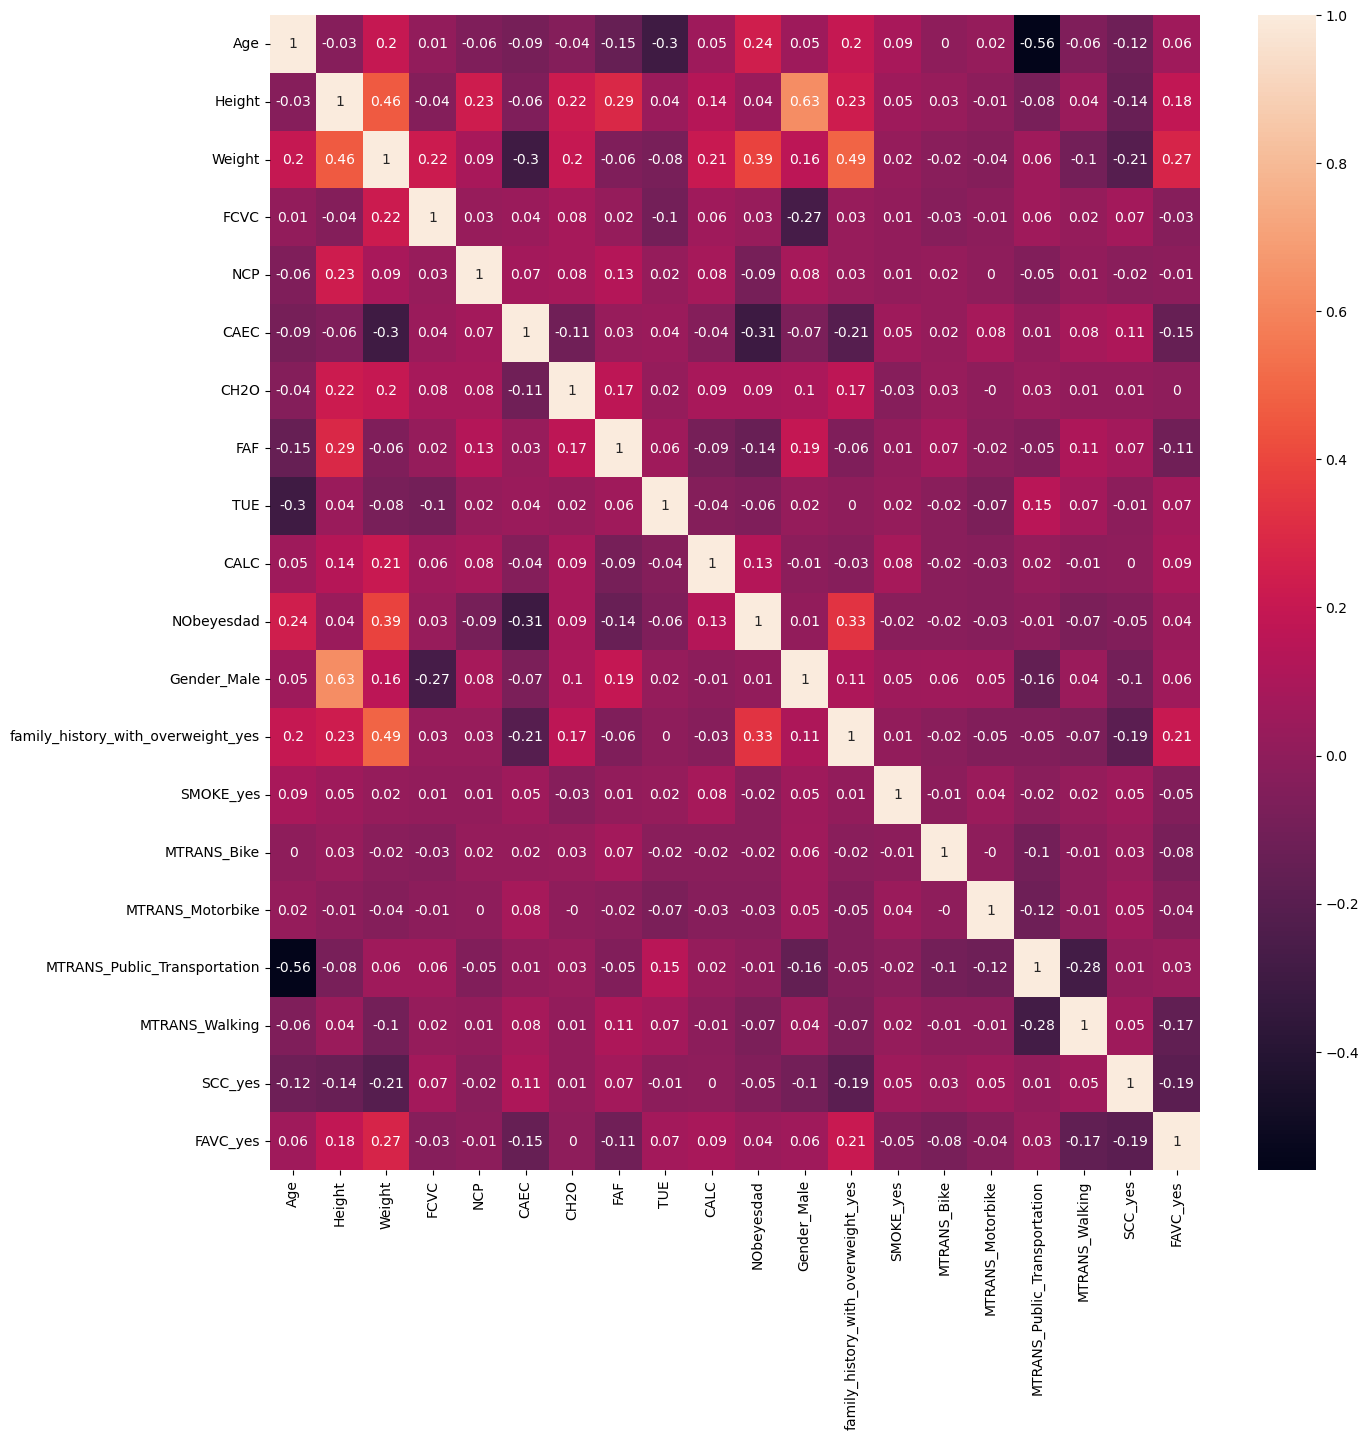

In [35]:
correlation(df_correlation)

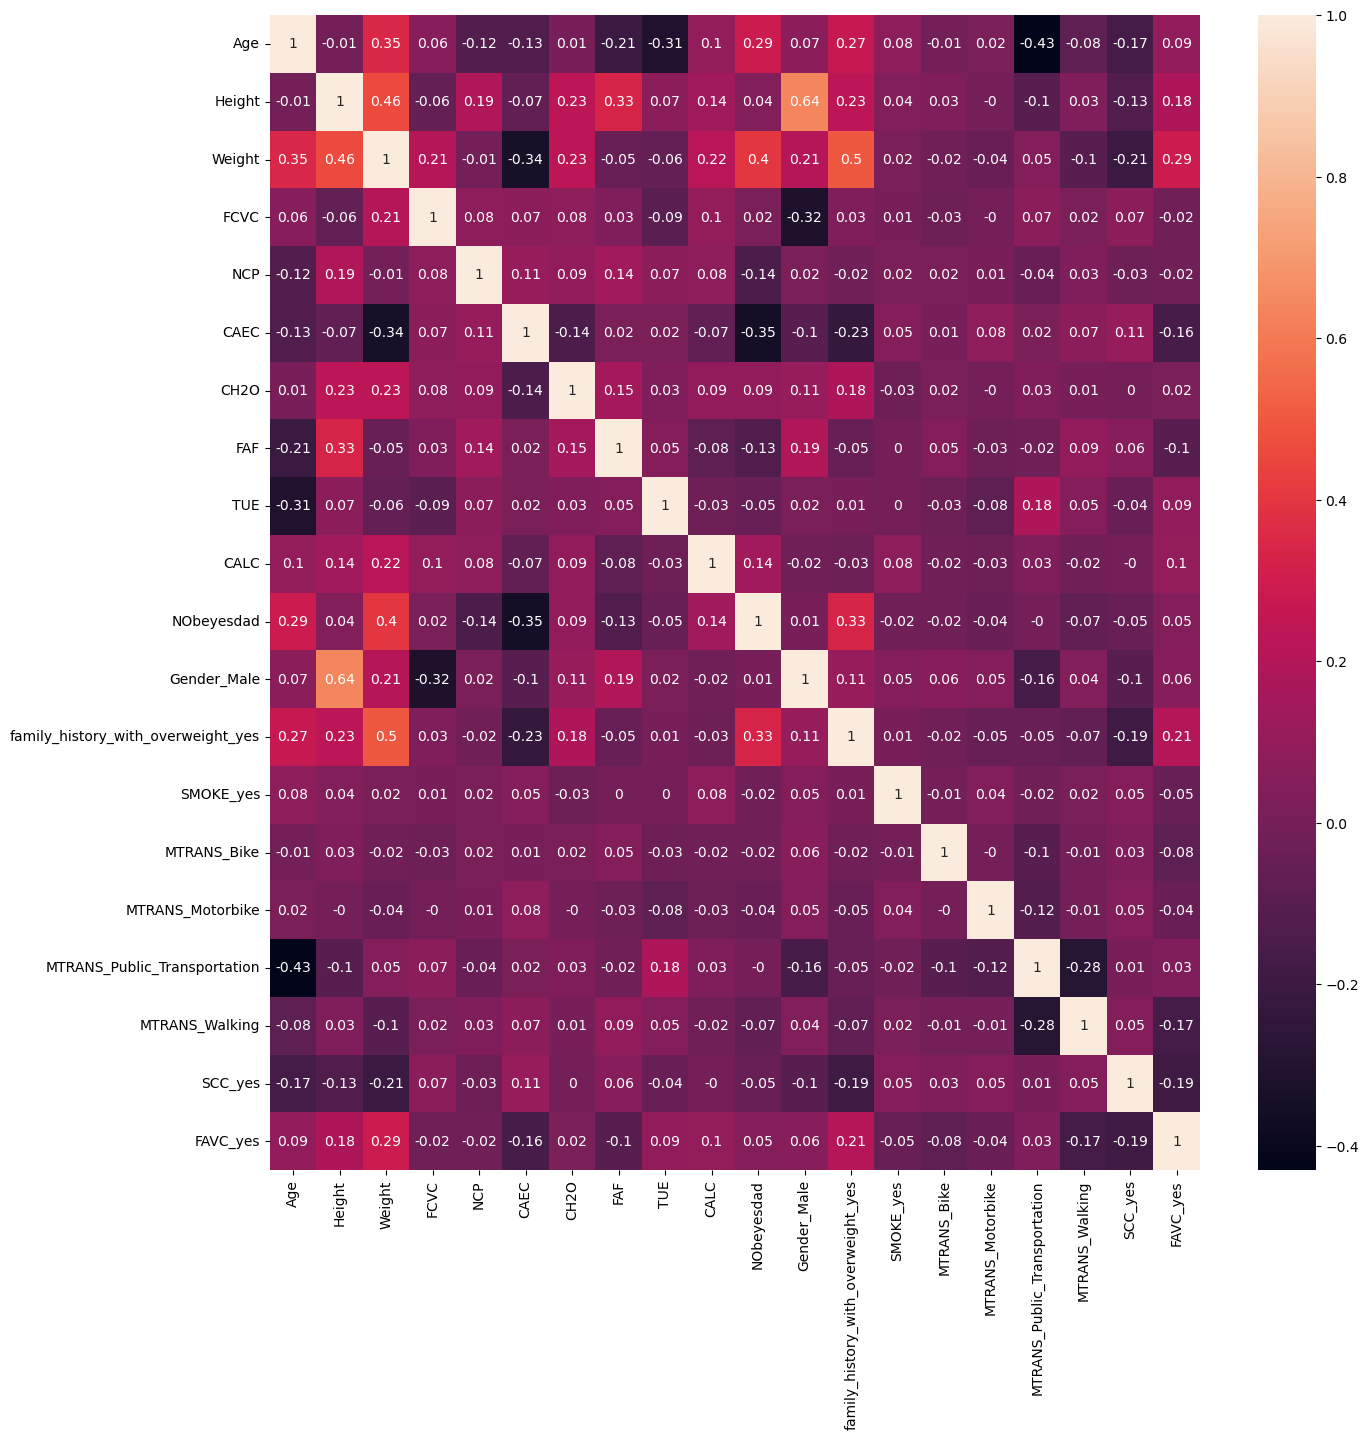

In [36]:
correlation(df_correlation, 'spearman')

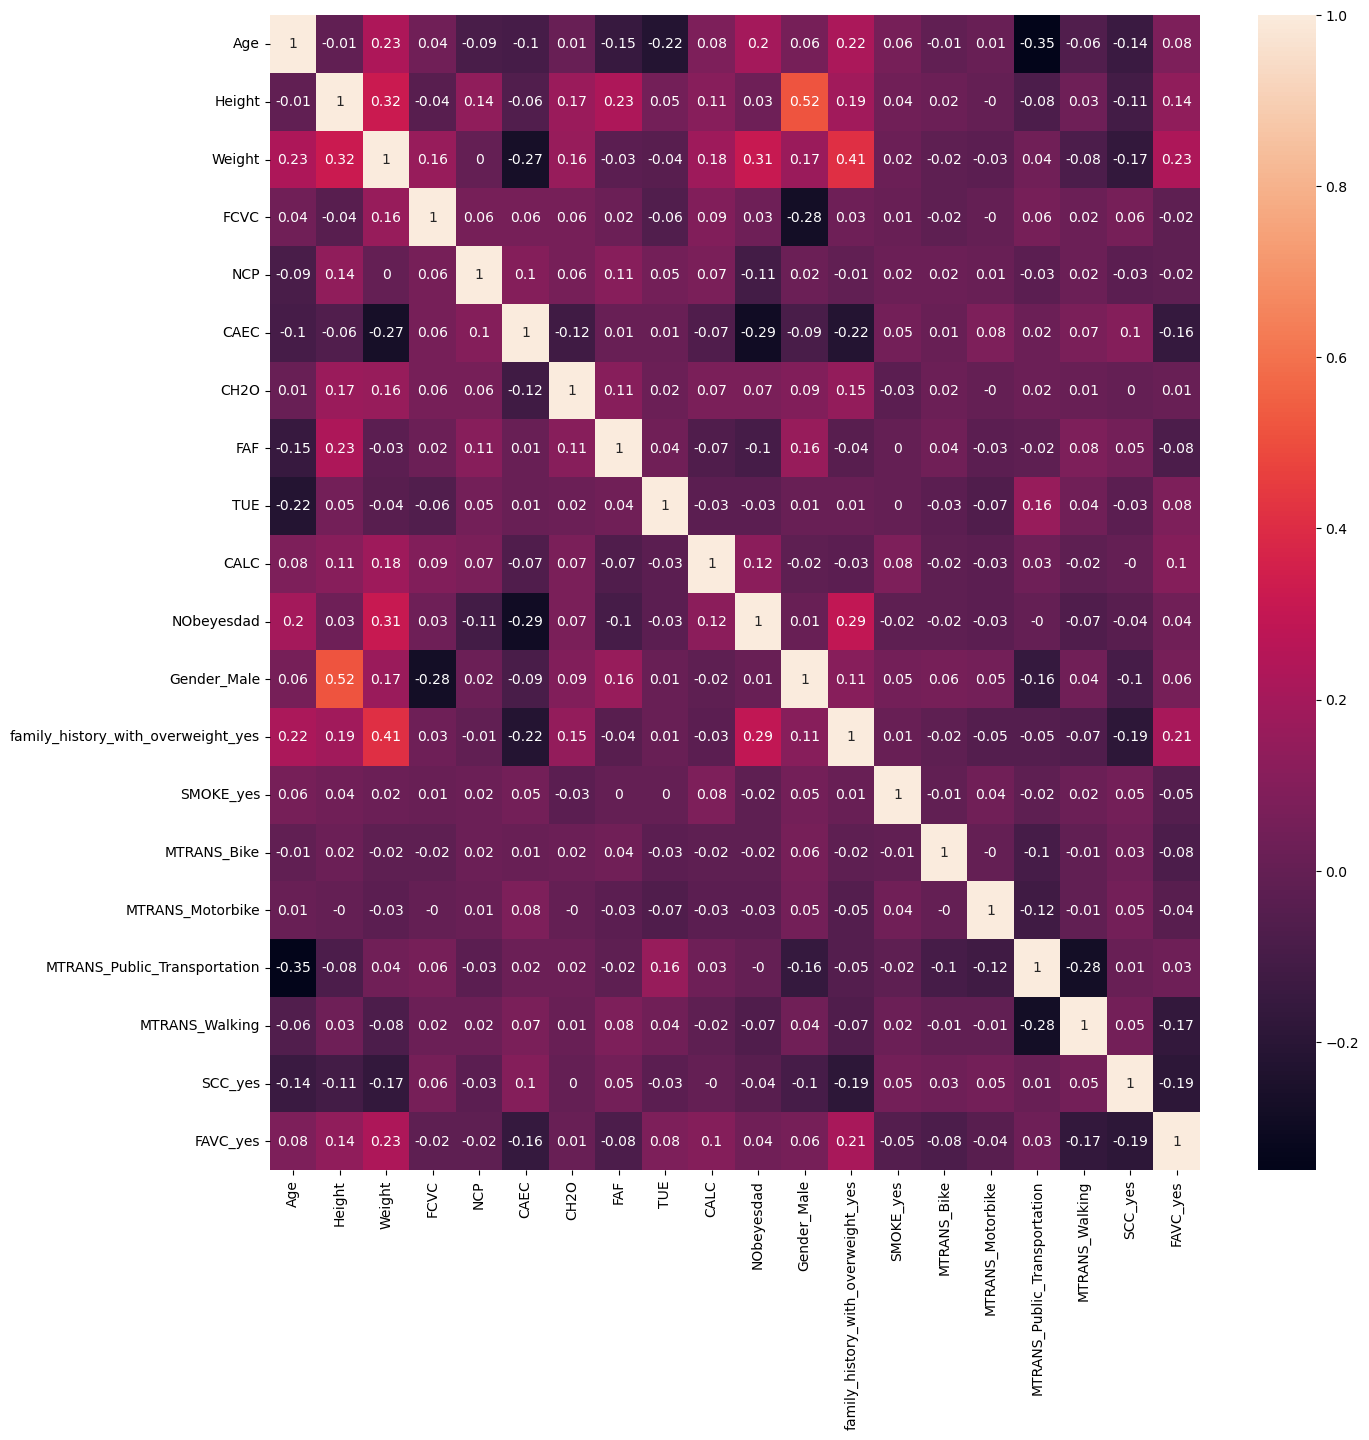

In [37]:
correlation(df_correlation, 'kendall')

In [38]:
X = df_correlation.copy()
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
categorical_features = df_correlation.select_dtypes(include=np.object_).columns

one_hot_features = list(set(categorical_features) - set(['CAEC', 'CALC', 'NObeyesdad'])) 

X_train = pd.get_dummies(X_train, columns=one_hot_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=one_hot_features, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

## Variance Threshold

In [40]:
X_train

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SCC_yes,FAVC_yes
44,21.000000,1.810000,80.000000,1.000000,3.000000,0.0,2.000000,2.000000,0.000000,0.0,1,True,False,False,False,False,True,False,False,False
691,18.000000,1.786758,51.524444,2.915480,3.000000,1.0,1.777486,1.077469,1.000000,1.0,0,True,False,False,False,False,True,False,False,True
667,22.396504,1.869098,61.411141,3.000000,3.263201,1.0,2.233274,1.557737,0.000355,1.0,0,True,True,False,False,False,False,False,False,True
170,22.000000,1.720000,82.000000,2.000000,1.000000,1.0,2.000000,2.000000,1.000000,1.0,6,True,False,False,False,False,True,False,False,True
310,17.000000,1.790000,57.000000,2.000000,4.000000,2.0,2.000000,2.000000,1.000000,0.0,0,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,23.083621,1.848553,121.421121,3.000000,2.567567,1.0,2.011023,0.916478,0.000000,1.0,3,True,True,False,False,False,True,False,False,True
1119,35.456326,1.651812,79.437921,2.156065,2.909117,1.0,1.221281,0.503279,1.796136,0.0,6,False,True,False,False,False,False,False,False,True
1154,22.882558,1.793451,89.909259,1.899116,2.375026,1.0,1.398540,0.000000,1.365793,1.0,6,True,True,False,False,False,True,False,False,True
1318,23.237302,1.761008,97.829344,2.000000,3.000000,1.0,2.988771,2.429923,1.978043,0.0,2,True,True,False,False,False,True,False,False,True


In [41]:
X_train.var()

Age                                    40.881141
Height                                  0.008577
Weight                                680.713556
FCVC                                    0.282579
NCP                                     0.585812
CAEC                                    0.211362
CH2O                                    0.364082
FAF                                     0.723244
TUE                                     0.366929
CALC                                    0.265905
NObeyesdad                              3.806937
Gender_Male                             0.250064
family_history_with_overweight_yes      0.144432
SMOKE_yes                               0.018817
MTRANS_Bike                             0.002989
MTRANS_Motorbike                        0.004773
MTRANS_Public_Transportation            0.188434
MTRANS_Walking                          0.025115
SCC_yes                                 0.045663
FAVC_yes                                0.103248
dtype: float64

In [42]:
selector = VarianceThreshold(threshold=0.2)
X_new = selector.fit_transform(X_train)
X_train.columns[selector.get_support()]

Index(['Age', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC',
       'NObeyesdad', 'Gender_Male'],
      dtype='object')

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1669 entries, 44 to 881
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1669 non-null   float64
 1   Height                              1669 non-null   float64
 2   Weight                              1669 non-null   float64
 3   FCVC                                1669 non-null   float64
 4   NCP                                 1669 non-null   float64
 5   CAEC                                1669 non-null   float64
 6   CH2O                                1669 non-null   float64
 7   FAF                                 1669 non-null   float64
 8   TUE                                 1669 non-null   float64
 9   CALC                                1669 non-null   float64
 10  NObeyesdad                          1669 non-null   int32  
 11  Gender_Male                         1669 non-nul

In [44]:
scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [45]:
X_train

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SCC_yes,FAVC_yes
44,0.148936,0.684849,0.305970,0.000000,0.666667,0.000000,0.500000,0.666667,0.000000,0.000000,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
691,0.085106,0.640635,0.093466,0.957740,0.666667,0.333333,0.388743,0.359156,0.500000,0.333333,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
667,0.178649,0.797275,0.167247,1.000000,0.754400,0.333333,0.616637,0.519246,0.000178,0.333333,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170,0.170213,0.513637,0.320896,0.500000,0.000000,0.333333,0.500000,0.666667,0.500000,0.333333,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
310,0.063830,0.646802,0.134328,0.500000,1.000000,0.666667,0.500000,0.666667,0.500000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.193269,0.758191,0.615083,1.000000,0.522522,0.333333,0.505511,0.305493,0.000000,0.333333,0.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1119,0.456518,0.383919,0.301776,0.578032,0.636372,0.333333,0.110641,0.167760,0.898068,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1154,0.188991,0.653367,0.379920,0.449558,0.458342,0.333333,0.199270,0.000000,0.682897,0.333333,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1318,0.196538,0.591649,0.439025,0.500000,0.666667,0.333333,0.994385,0.809974,0.989021,0.000000,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [46]:
X_train.var()

Age                                   0.018507
Height                                0.031041
Weight                                0.037910
FCVC                                  0.070645
NCP                                   0.065090
CAEC                                  0.023485
CH2O                                  0.091021
FAF                                   0.080360
TUE                                   0.091732
CALC                                  0.029545
NObeyesdad                            0.105748
Gender_Male                           0.250064
family_history_with_overweight_yes    0.144432
SMOKE_yes                             0.018817
MTRANS_Bike                           0.002989
MTRANS_Motorbike                      0.004773
MTRANS_Public_Transportation          0.188434
MTRANS_Walking                        0.025115
SCC_yes                               0.045663
FAVC_yes                              0.103248
dtype: float64

In [47]:
X_train_dt = X_train.copy(deep=True)
X_train_dt = X_train_dt.drop(['NObeyesdad'], axis=1)
X_test_dt = X_test.copy(deep=True)
X_test_dt = X_test_dt.drop(['NObeyesdad'], axis=1)
y_train_dt = y_train.copy(deep=True)
y_test_dt = y_test.copy(deep=True)

In [48]:
selector = VarianceThreshold(threshold=0.2)
X_new = selector.fit_transform(X_train)
selector.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False])

In [49]:
X_train

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SCC_yes,FAVC_yes
44,0.148936,0.684849,0.305970,0.000000,0.666667,0.000000,0.500000,0.666667,0.000000,0.000000,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
691,0.085106,0.640635,0.093466,0.957740,0.666667,0.333333,0.388743,0.359156,0.500000,0.333333,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
667,0.178649,0.797275,0.167247,1.000000,0.754400,0.333333,0.616637,0.519246,0.000178,0.333333,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170,0.170213,0.513637,0.320896,0.500000,0.000000,0.333333,0.500000,0.666667,0.500000,0.333333,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
310,0.063830,0.646802,0.134328,0.500000,1.000000,0.666667,0.500000,0.666667,0.500000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.193269,0.758191,0.615083,1.000000,0.522522,0.333333,0.505511,0.305493,0.000000,0.333333,0.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1119,0.456518,0.383919,0.301776,0.578032,0.636372,0.333333,0.110641,0.167760,0.898068,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1154,0.188991,0.653367,0.379920,0.449558,0.458342,0.333333,0.199270,0.000000,0.682897,0.333333,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1318,0.196538,0.591649,0.439025,0.500000,0.666667,0.333333,0.994385,0.809974,0.989021,0.000000,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Chi square (X^2)

In [50]:
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X_train, y_train)

print(selector.get_support())
print(X_train.columns[selector.get_support()])
print(selector.scores_)

[ True False  True  True False False False False False False  True  True
  True False False False  True  True  True  True]
Index(['Age', 'Weight', 'FCVC', 'NObeyesdad', 'Gender_Male',
       'family_history_with_overweight_yes', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'SCC_yes', 'FAVC_yes'],
      dtype='object')
[ 23.68262721   9.23806951 148.59661459  39.28858839  14.33400245
  20.45699522  11.54161132  19.58704228  10.76453408  17.83477199
 347.09183206 260.96346625  90.46729832  20.15614811  14.63529412
  19.43552791  30.0344999   64.19133699 100.96280462  23.2774139 ]


anova
decision tree
random forrest
xgboost
svm
naive bayes


Anova

In [51]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_train, y_train)

print(selector.get_support())
print(X_train.columns[selector.get_support()])
print(selector.scores_)

[ True  True  True  True  True  True False False False  True False  True
  True False False False False False False  True]
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CALC', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes'],
      dtype='object')
[ 5.64533862e+01  2.61021178e+01  1.50313177e+03  8.69845071e+01
  2.22602667e+01  6.93154197e+01  1.10374046e+01  1.44812329e+01
  6.58629790e+00  2.70290372e+01 -2.14886358e+17  1.29537899e+02
  1.24344295e+02  3.45318011e+00  2.45790179e+00  3.27957953e+00
  2.13340833e+01  1.13848775e+01  1.87943534e+01  3.75480232e+01]


In [52]:
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_new = selector.fit_transform(X_train, y_train)

print(selector.get_support())
print(X_train.columns[selector.get_support()])
print(selector.scores_)

[ True  True  True  True  True False  True  True  True False  True  True
 False False False False False False False False]
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Male'],
      dtype='object')
[0.57188051 0.40656091 1.23742912 0.3676347  0.24359694 0.14169315
 0.32466771 0.28824094 0.29384638 0.06607904 1.94301787 0.17366382
 0.16221268 0.01638761 0.         0.         0.07271737 0.01812674
 0.04003304 0.06191477]


In [53]:
X = X.drop(['NObeyesdad'], axis=1)
X

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SCC_yes,FAVC_yes
0,21.000000,1.620000,64.000000,2.0,3.0,1.0,2.000000,0.000000,1.000000,0.0,False,True,False,False,False,True,False,False,False
1,21.000000,1.520000,56.000000,3.0,3.0,1.0,3.000000,3.000000,0.000000,1.0,False,True,True,False,False,True,False,True,False
2,23.000000,1.800000,77.000000,2.0,3.0,1.0,2.000000,2.000000,1.000000,2.0,True,True,False,False,False,True,False,False,False
3,27.000000,1.800000,87.000000,3.0,3.0,1.0,2.000000,2.000000,0.000000,2.0,True,False,False,False,False,False,True,False,False
4,22.000000,1.780000,89.800000,2.0,1.0,1.0,2.000000,0.000000,0.000000,1.0,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.0,1.728139,1.676269,0.906247,1.0,False,True,False,False,False,True,False,False,True
2107,21.982942,1.748584,133.742943,3.0,3.0,1.0,2.005130,1.341390,0.599270,1.0,False,True,False,False,False,True,False,False,True
2108,22.524036,1.752206,133.689352,3.0,3.0,1.0,2.054193,1.414209,0.646288,1.0,False,True,False,False,False,True,False,False,True
2109,24.361936,1.739450,133.346641,3.0,3.0,1.0,2.852339,1.139107,0.586035,1.0,False,True,False,False,False,True,False,False,True


In [54]:
estimator = XGBClassifier()
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=47, shuffle=True))
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=47, shuffle=True),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))

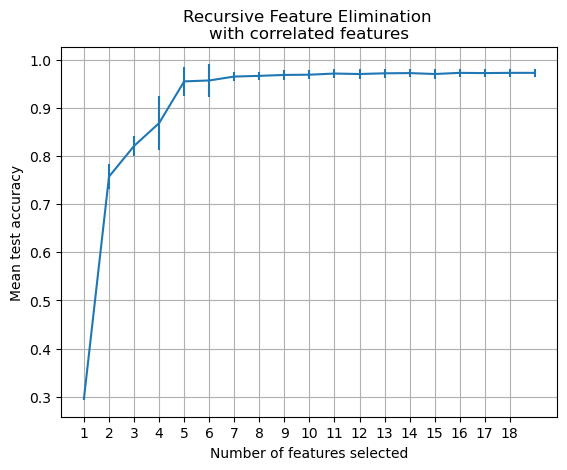

In [55]:
cv_results = pd.DataFrame(rfecv.cv_results_)
plt.grid()
plt.xlabel("Number of features selected")
plt.xticks(range(1, len(cv_results["n_features"])))
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [56]:
cv_results["std_test_score"]

0     0.002852
1     0.026667
2     0.020138
3     0.056060
4     0.030257
5     0.034355
6     0.009788
7     0.008541
8     0.010954
9     0.009378
10    0.009052
11    0.009737
12    0.009651
13    0.008743
14    0.010195
15    0.008279
16    0.009004
17    0.008549
18    0.008549
Name: std_test_score, dtype: float64

In [57]:
estimator = XGBClassifier()
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=47, shuffle=True), min_features_to_select=5)
rfecv.fit(X, y)

feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfecv.ranking_,
    'Support': rfecv.support_
}).sort_values(by='Rank')

print("Feature Rankings:\n", feature_ranking)

top_5_features = feature_ranking.loc[feature_ranking['Rank'] <= 5, 'Feature']
print(f"Top 5 Features: {top_5_features}")

Feature Rankings:
                                Feature  Rank  Support
0                                  Age     1     True
16                      MTRANS_Walking     1     True
15        MTRANS_Public_Transportation     1     True
14                    MTRANS_Motorbike     1     True
12                           SMOKE_yes     1     True
11  family_history_with_overweight_yes     1     True
10                         Gender_Male     1     True
17                             SCC_yes     1     True
9                                 CALC     1     True
7                                  FAF     1     True
6                                 CH2O     1     True
5                                 CAEC     1     True
4                                  NCP     1     True
3                                 FCVC     1     True
2                               Weight     1     True
1                               Height     1     True
8                                  TUE     1     True
18       

In [58]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1])

In [59]:
df_result = pd.DataFrame()
xgboost = XGBClassifier(random_state=42)

In [60]:
def evaluate_model(X_train_dt, X_test_dt, y_train_dt, y_test_dt, model, df_result, df_name):
    

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    start_time = time.time()
    scores = cross_val_score(model, X_train_dt, y_train_dt, cv=kf, scoring='accuracy')
    elapsed_time = time.time() - start_time
    cv_results = {
        'Dataset': f'{df_name}',
        'Accuracy': f'{scores.mean():.3f} (Time: {elapsed_time:.2f}s)',
        'Std': scores.std()
    }

    test_results = {}
    cv_results_df = pd.DataFrame([cv_results])


    start_time = time.time()
    model.fit(X_train_dt, y_train_dt)
    elapsed_time = time.time() - start_time
    y_pred_dt = model.predict(X_test_dt)
    accuracy = accuracy_score(y_test_dt, y_pred_dt)
    test_results = {
        'Dataset': f'{df_name}',
        'Accuracy': f'{accuracy:.3f} (Time: {elapsed_time:.3f}s)'
    }
    print(f'Test Accuracy: {accuracy:.3f}, Time = {elapsed_time:.3f}s')

    test_results_df = pd.DataFrame([test_results], index=[0])
    df_result = pd.concat([df_result, test_results_df], ignore_index=True)
    return df_result

In [61]:
df_result = evaluate_model(
    X_train_dt,
    X_test_dt,
    y_train_dt, y_test_dt, xgboost, df_result,
    'XGBoost'
)

Test Accuracy: 0.976, Time = 0.321s


In [62]:
start_time = time.time()
rfe = RFE(estimator=estimator, n_features_to_select=5)
rfe.fit(X, y)
elapsed_time = time.time() - start_time
elapsed_time

4.345867872238159

In [63]:
selected_features = X.columns[rfe.support_]
print(f"Selected features: {selected_features}")

Selected features: Index(['Height', 'Weight', 'FCVC', 'CALC', 'Gender_Male'], dtype='object')


In [64]:
df_result = evaluate_model(
    X_train[['Height', 'Weight', 'FCVC', 'CALC', 'Gender_Male']],
    X_test[['Height', 'Weight', 'FCVC', 'CALC', 'Gender_Male']],
    y_train, y_test, xgboost, df_result,
    'XGBoost RFE, 5 features'
)

Test Accuracy: 0.959, Time = 0.260s


In [65]:
rfe.ranking_

array([ 7,  1,  1,  1,  4,  3,  5,  9,  8,  1,  1, 13, 12, 15, 10, 14,  6,
       11,  2])

In [66]:
start_time = time.time()
sfs = SequentialFeatureSelector(estimator=estimator, direction='forward')
sfs.fit(X, y)
elapsed_time = time.time() - start_time
elapsed_time

149.52680134773254

In [67]:
sfs.get_feature_names_out()

array(['Age', 'Height', 'Weight', 'NCP', 'SMOKE_yes', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'], dtype=object)

In [68]:
sfs.n_features_to_select_

9

In [69]:
start_time = time.time()
sfs = SequentialFeatureSelector(estimator=estimator, direction='backward')
sfs.fit(X, y)
elapsed_time = time.time() - start_time
elapsed_time

200.24889755249023

In [70]:
sfs.get_feature_names_out()

array(['Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'TUE', 'Gender_Male',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'SCC_yes'],
      dtype=object)

In [71]:
df_result = evaluate_model(
    X_train[['Age', 'Height', 'Weight', 'NCP', 'MTRANS_Bike',
             'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
             'MTRANS_Walking', 'SMOKE_yes']],
    X_test[['Age', 'Height', 'Weight', 'NCP', 'MTRANS_Bike',
            'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
            'MTRANS_Walking', 'SMOKE_yes']],
    y_train, y_test, xgboost, df_result,
    'XGBoost SFS, 9 features, forward'
)

Test Accuracy: 0.950, Time = 0.269s


In [72]:
df_result = evaluate_model(X_train[['Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'TUE', 'SCC_yes',
             'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Gender_Male']],
    X_test[['Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'TUE', 'SCC_yes',
            'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Gender_Male']],
    y_train, y_test, xgboost, df_result,
    'XGBoost SFS, 10 features, backward')

Test Accuracy: 0.962, Time = 0.270s


In [73]:
df_result

,Dataset,Accuracy
0,XGBoost,0.976 (Time: 0.321s)
1,"XGBoost RFE, 5 features",0.959 (Time: 0.260s)
2,"XGBoost SFS, 9 features, forward",0.950 (Time: 0.269s)
3,"XGBoost SFS, 10 features, backward",0.962 (Time: 0.270s)


In [74]:
decision_tree = DecisionTreeClassifier(random_state=42)
df_result = evaluate_model(X_train_dt, X_test_dt, y_train_dt, y_test_dt, decision_tree, df_result, 'Decision Tree')
df_result

Test Accuracy: 0.911, Time = 0.019s


,Dataset,Accuracy
0,XGBoost,0.976 (Time: 0.321s)
1,"XGBoost RFE, 5 features",0.959 (Time: 0.260s)
2,"XGBoost SFS, 9 features, forward",0.950 (Time: 0.269s)
3,"XGBoost SFS, 10 features, backward",0.962 (Time: 0.270s)
4,Decision Tree,0.911 (Time: 0.019s)


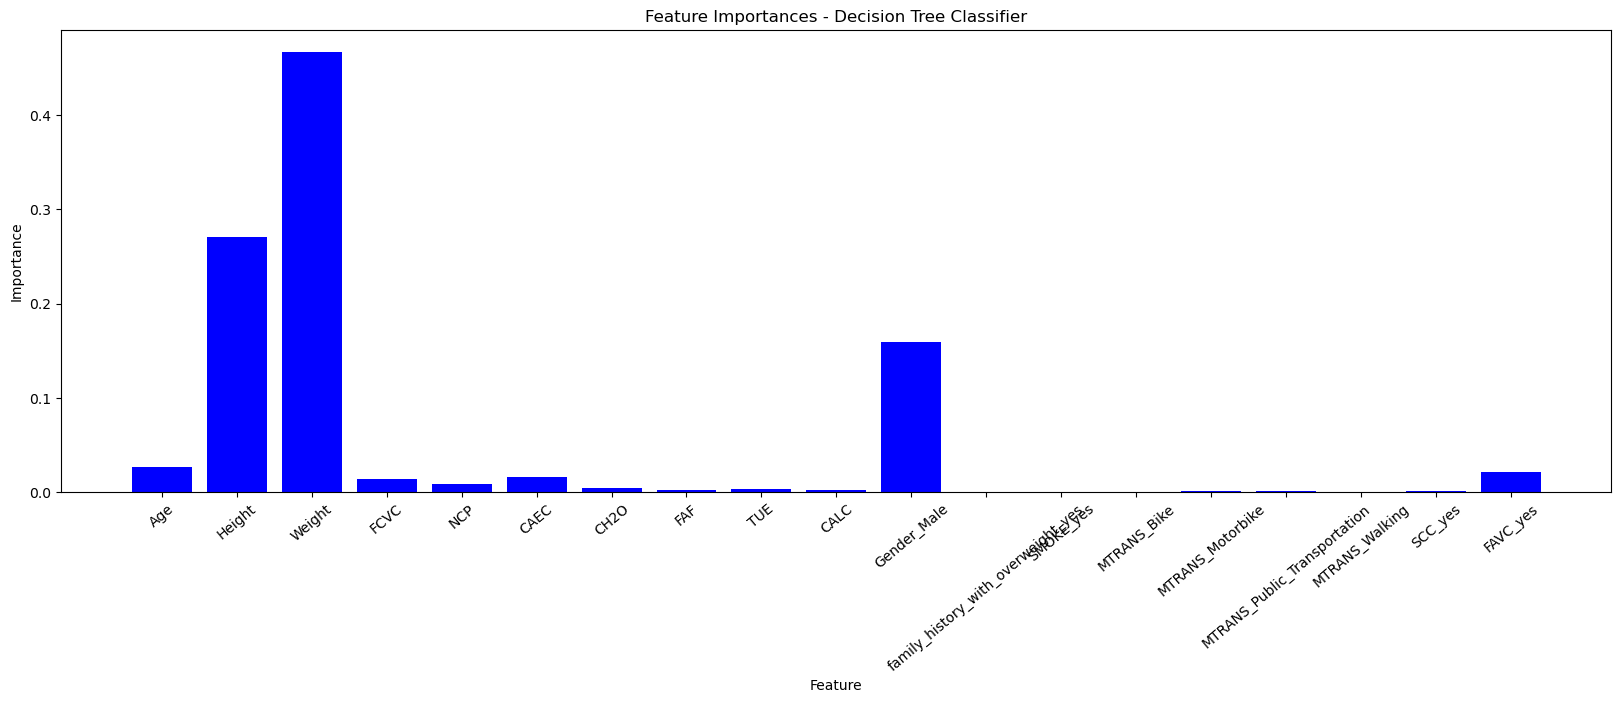

In [75]:
importances = decision_tree.feature_importances_

plt.figure(figsize=(20, 6))
plt.bar(range(X_train_dt.shape[1]), importances, color='blue', align='center')
plt.xticks(range(X_train_dt.shape[1]), [f'{feature}' for feature in X_train_dt.columns], rotation = 40)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Decision Tree Classifier')
plt.show()

In [76]:
decision_tree = DecisionTreeClassifier(random_state=42)
df_result = evaluate_model(X_train_dt[['Age', 'Height', 'Weight', 'Gender_Male', 'FAVC_yes']],
                           X_test_dt[['Age', 'Height', 'Weight', 'Gender_Male', 'FAVC_yes']],
                           y_train_dt, y_test_dt, decision_tree, df_result, 'Decision Tree, 5 features')
df_result

Test Accuracy: 0.935, Time = 0.007s


,Dataset,Accuracy
0,XGBoost,0.976 (Time: 0.321s)
1,"XGBoost RFE, 5 features",0.959 (Time: 0.260s)
2,"XGBoost SFS, 9 features, forward",0.950 (Time: 0.269s)
3,"XGBoost SFS, 10 features, backward",0.962 (Time: 0.270s)
4,Decision Tree,0.911 (Time: 0.019s)
5,"Decision Tree, 5 features",0.935 (Time: 0.007s)


In [77]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
df_result = evaluate_model(X_train_dt[['Age', 'Height', 'Weight', 'Gender_Male', 'FAVC_yes']],
                           X_test_dt[['Age', 'Height', 'Weight', 'Gender_Male', 'FAVC_yes']],
                           y_train_dt, y_test_dt, decision_tree, df_result, 'Decision Tree, 5 features, max depth 5')
df_result

Test Accuracy: 0.813, Time = 0.004s


,Dataset,Accuracy
0,XGBoost,0.976 (Time: 0.321s)
1,"XGBoost RFE, 5 features",0.959 (Time: 0.260s)
2,"XGBoost SFS, 9 features, forward",0.950 (Time: 0.269s)
3,"XGBoost SFS, 10 features, backward",0.962 (Time: 0.270s)
4,Decision Tree,0.911 (Time: 0.019s)
5,"Decision Tree, 5 features",0.935 (Time: 0.007s)
6,"Decision Tree, 5 features, max depth 5",0.813 (Time: 0.004s)


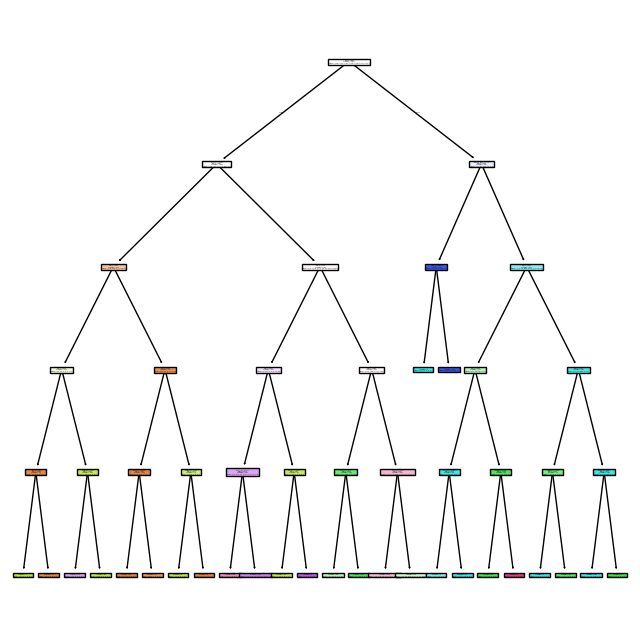

In [78]:
dt = decision_tree.fit(X_train_dt[['Age', 'Height', 'Weight', 'Gender_Male', 'FAVC_yes']], y_train_dt)
fig = plt.figure(figsize=(8,8))
_ = tree.plot_tree(dt,
                   feature_names=['Age', 'Height', 'Weight', 'Gender_Male', 'FAVC_yes'],
                   filled=True)

In [79]:
random_forest = RandomForestClassifier(random_state=42)
df_result = evaluate_model(X_train_dt, X_test_dt, y_train_dt, y_test_dt, random_forest, df_result, 'Random Forest')
df_result

Test Accuracy: 0.962, Time = 0.412s


,Dataset,Accuracy
0,XGBoost,0.976 (Time: 0.321s)
1,"XGBoost RFE, 5 features",0.959 (Time: 0.260s)
2,"XGBoost SFS, 9 features, forward",0.950 (Time: 0.269s)
3,"XGBoost SFS, 10 features, backward",0.962 (Time: 0.270s)
4,Decision Tree,0.911 (Time: 0.019s)
5,"Decision Tree, 5 features",0.935 (Time: 0.007s)
6,"Decision Tree, 5 features, max depth 5",0.813 (Time: 0.004s)
7,Random Forest,0.962 (Time: 0.412s)


In [80]:
df_score

,Dataset,Decision Tree,Random Forest,SVM,XGBOOST,Logistic Regression,KNN
0,Unmodified,"Accuracy: 0.911, Time: 0.014s","Accuracy: 0.962, Time: 0.408s","Accuracy: 0.904, Time: 0.676s","Accuracy: 0.976, Time: 0.370s","Accuracy: 0.868, Time: 0.134s","Accuracy: 0.818, Time: 0.002s"


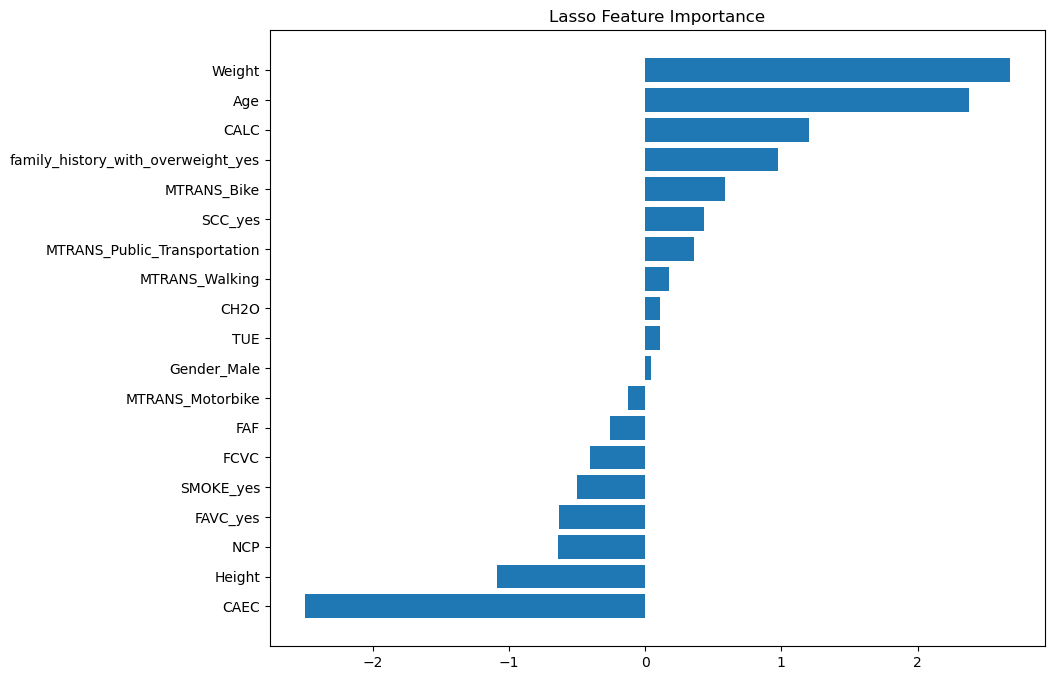

In [81]:
lasso = Lasso(random_state=42, alpha=0.00001)
lasso.fit(X_train_dt, y_train_dt)

feature_importance = np.array(lasso.coef_)
feature_names = np.array(X_train_dt.columns)
data = {'Feature Names': feature_names, 'Importance': feature_importance}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['Importance'], ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
plt.title(f'Lasso Feature Importance')
plt.barh(fi_df['Feature Names'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.show()

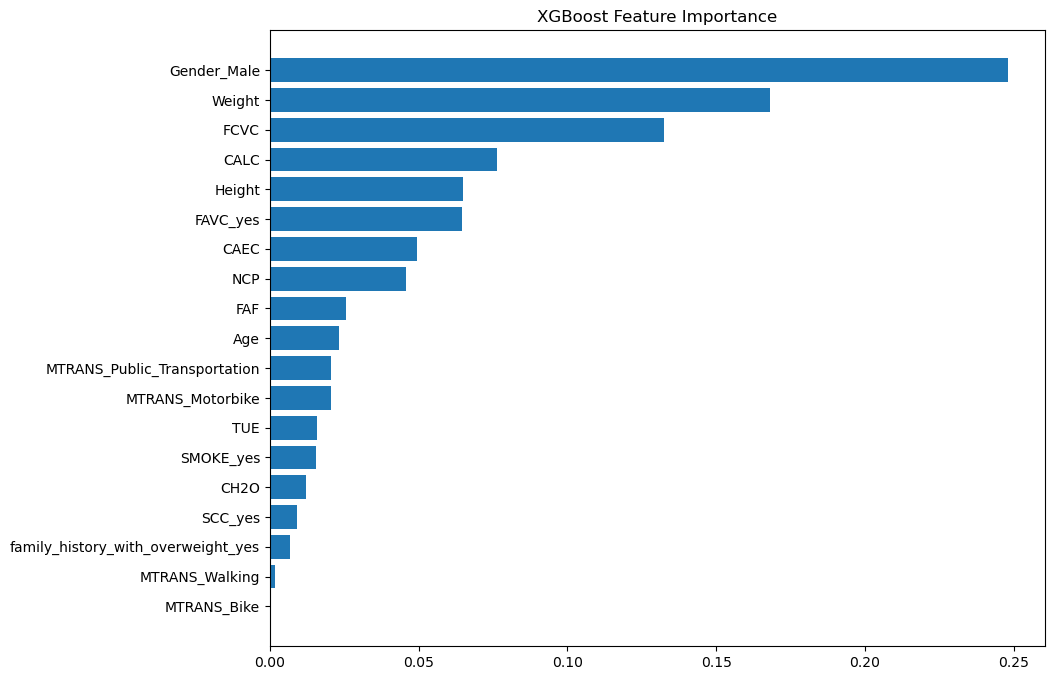

In [82]:
xgboost = XGBClassifier(random_state=42)
xgboost.fit(X_train_dt, y_train_dt)

feature_importance = np.array(xgboost.feature_importances_)
feature_names = np.array(X_train_dt.columns)
data = {'Feature Names': feature_names, 'Importance': feature_importance}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['Importance'], ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
plt.title(f'XGBoost Feature Importance')
plt.barh(fi_df['Feature Names'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.show()